## Filter out movies with too few ratings

In [1]:
import pandas as pd
import glob
%matplotlib inline

### Concat to 1 df

In [2]:
df_rating = []
for file in glob.glob("crawl-ratings/*00.csv"):
    df_rating.append(pd.read_csv(file))

In [3]:
df_rating = pd.concat(df_rating)

In [4]:
df_rating

,UserID,MovieID,Rating
0,ur66355076,tt3501632,7
1,ur66355076,tt5776858,8
2,ur66355076,tt2543164,9
3,ur66355076,tt1856101,8
4,ur66355076,tt1825683,9
...,...,...,...
182881,ur3032357,tt0120685,4
182882,ur3032357,tt0145681,7
182883,ur3032357,tt0075148,9
182884,ur3032357,tt0088763,8


In [5]:
movie_stat = df_rating['MovieID'].value_counts()

### Some stats

In [6]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=5].sum())
print(movie_stat[movie_stat<5].sum())

1626980
1464738
162242


In [7]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=10].sum())
print(movie_stat[movie_stat<10].sum())

1626980
1361252
265728


In [8]:
print(movie_stat.value_counts()[4:9].sum())
print(movie_stat.value_counts()[9:].sum())
print(movie_stat.value_counts().sum())

15844
22874
137775


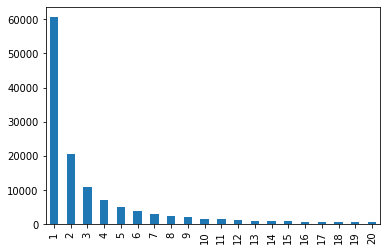

In [9]:
movie_stat.value_counts()[:20].plot.bar()

### Filter with threshold

In [10]:
threshold=5

In [11]:
df_rating_filtered = df_rating[df_rating.MovieID.isin(movie_stat[movie_stat>=threshold].index)]

In [12]:
df_rating_filtered['MovieID'].value_counts()

tt0096697    5929
tt0944947    3676
tt0108778    3239
tt0052520    2891
tt0903747    2409
             ... 
tt0439707       5
tt0079803       5
tt0387887       5
tt7853068       5
tt0037662       5
Name: MovieID, Length: 38718, dtype: int64

In [13]:
df_rating_filtered['UserID'].value_counts()

ur19009969     18019
ur3032357      16635
ur2467618      15745
ur1896124      13019
ur2483625      12834
               ...  
ur46768703        91
ur108071848       86
ur94875269        85
ur14330747        61
ur92127176        59
Name: UserID, Length: 1105, dtype: int64

In [17]:
df_rating_filtered.to_csv('crawl-ratings/rating-filtered.csv', index=False)